<a href="https://colab.research.google.com/github/ASHUTOSH-THAPA/Neural-Network-on-FashionMNIST-Multi-class-Classification-with-PyTorch-/blob/main/Q_A_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from google.colab import drive
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
df=pd.read_csv('/content/drive/MyDrive/general_knowledge_qa.csv')
df=df[['question','answer']]
df.head()

,question,answer
0,How many days do we have in a week?,Seven
1,How many days are there in a normal year?,365 (not a leap year)
2,How many colors are there in a rainbow?,7
3,Which animal is known as the ‘Ship of the Dese...,Camel
4,How many letters are there in the English alph...,26


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('question').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('answer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['answer'].value_counts()
    for x_label, grp in _df_2.groupby('question')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('question')
_ = plt.ylabel('answer')

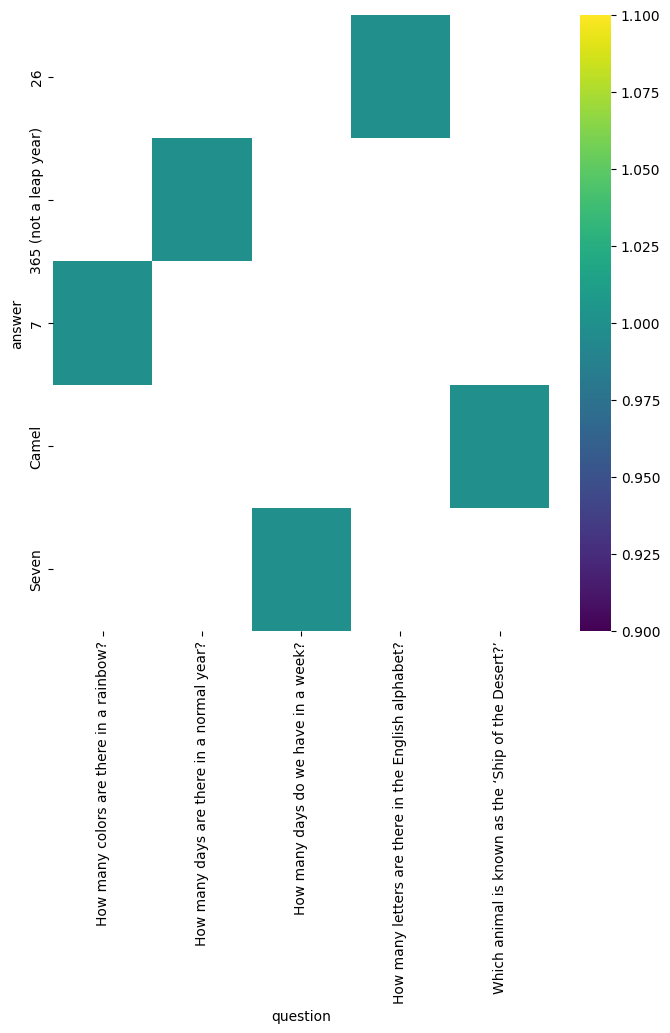

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['answer'].value_counts()
    for x_label, grp in _df_2.groupby('question')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('question')
_ = plt.ylabel('answer')

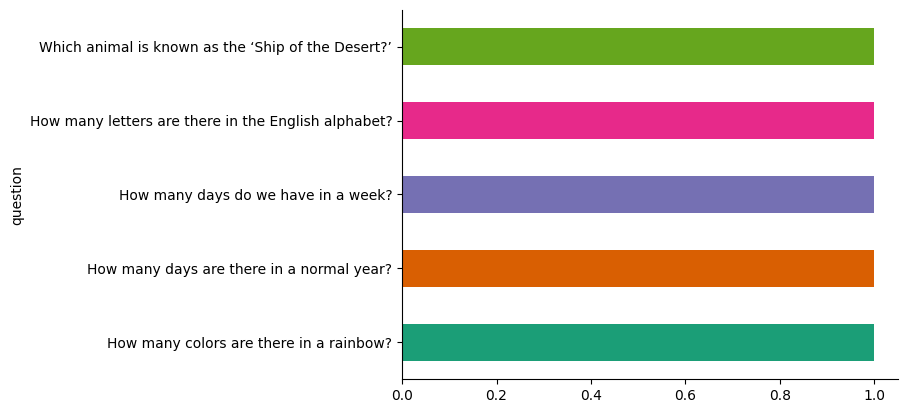

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('question').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
df.shape

(930, 2)

In [32]:
import re
def tokenize(text):
  text=text.lower()
  text=re.sub(r"[^\w\s]","",text)
  return text.split()


In [33]:
vocab={'<UNK>':0}
def build_vocab(row):
  tokenized_question=tokenize(row['question'])
  tokenized_answer=tokenize(row['answer'])
  merged_tokens=tokenized_question+tokenized_answer
  for token in merged_tokens:
    if token not in vocab:
      vocab[token]=len(vocab)


In [34]:
df.apply(build_vocab,axis=1)

,0
0,None
1,None
2,None
3,None
4,None
...,...
925,None
926,None
927,None
928,None


In [35]:
# convert words to numerical indices
def text_to_indices(text, vocab):

  indexed_text = []

  for token in tokenize(text):

    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text

In [36]:
class QADataset(Dataset):

  def __init__(self, df, vocab):
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, index):

    numerical_question = text_to_indices(self.df.iloc[index]['question'], self.vocab)
    numerical_answer = text_to_indices(self.df.iloc[index]['answer'], self.vocab)

    return torch.tensor(numerical_question), torch.tensor(numerical_answer)

In [37]:
dataset = QADataset(df, vocab)

In [38]:
dataloader=DataLoader(dataset, batch_size=1, shuffle=True)

In [39]:
for question, answer in dataloader:
  print(question, answer[0])

tensor([[ 21, 879,  28,   8, 880,  41, 885]]) tensor([886])
tensor([[124, 181, 273]]) tensor([274, 275])
tensor([[  60,   23,   26,  688,  689,   28, 1594]]) tensor([1595, 1596, 1597])
tensor([[   1,    2,  867,   88,    8, 1024,    6]]) tensor([651])
tensor([[  60,   23,   26,  325,   28, 1153, 1154, 1155]]) tensor([1156, 1157])
tensor([[ 21,  23,  26, 159, 211,  26, 163,  43,  28, 212]]) tensor([161])
tensor([[  60,   23,   26,  472,   28, 1820]]) tensor([1821])
tensor([[ 124,  251, 1930]]) tensor([1931, 1932, 1933])
tensor([[ 915,   60,   23,   26,  688,  689,   28, 1362]]) tensor([1385, 1386, 1387])
tensor([[ 118,  396,   23,  828,  128,   26, 1127,   28,  876]]) tensor([2032])
tensor([[  21,   23,   26,  225, 1967,   43]]) tensor([228])
tensor([[325,  26, 225, 168,   7,  26,  68]]) tensor([1652,  168])
tensor([[  26,  195,  595, 1260,   28, 1261,   11,  597,   23,   51]]) tensor([1262])
tensor([[ 124,   23,   24,   25, 1371,   28,  290]]) tensor([1372, 1373])
tensor([[325,  26, 25

In [40]:
class SimpleRNN(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn = nn.RNN(50, 64, batch_first=True)
    self.fc = nn.Linear(64, vocab_size)

  def forward(self, question):
    embedded_question = self.embedding(question)
    hidden, final = self.rnn(embedded_question)
    output = self.fc(final.squeeze(0))

    return output

In [41]:
learning_rate = 0.001
epochs = 20

In [42]:
model=SimpleRNN(len(vocab))

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
for epoch in range(epochs):
    total_loss = 0

    for question, answer in dataloader:
        optimizer.zero_grad()

        output = model(question)  # output: [batch_size, vocab_size
        answer = answer[:, 0]
        loss = criterion(output, answer)  # No [0], use full batch

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 6764.6261
Epoch 2, Loss: 5109.3567
Epoch 3, Loss: 4072.3380
Epoch 4, Loss: 3174.7941
Epoch 5, Loss: 2394.8494
Epoch 6, Loss: 1741.4771
Epoch 7, Loss: 1224.2338
Epoch 8, Loss: 856.5328
Epoch 9, Loss: 620.8712
Epoch 10, Loss: 457.1506
Epoch 11, Loss: 333.7781
Epoch 12, Loss: 244.3863
Epoch 13, Loss: 194.9206
Epoch 14, Loss: 144.4873
Epoch 15, Loss: 109.0525
Epoch 16, Loss: 89.5105
Epoch 17, Loss: 68.5071
Epoch 18, Loss: 46.7682
Epoch 19, Loss: 40.0870
Epoch 20, Loss: 29.3347


In [46]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = text_to_indices(question, vocab)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max prob
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(vocab.keys())[index])

In [47]:
predict(model, "What is the largest planet in our solar system?")

jupiter
